# Regression Phase 6: Ridge Regression (interpretation)


we will run ridge regression multiple times with different L2 penalties to see which one produces the best fit. We will revisit the example of polynomial regression as a means to see the effect of L2 regularization. 

* Use a pre-built implementation of regression (GraphLab Create) to run polynomial regression
* Use matplotlib to visualize polynomial regressions
* Use a pre-built implementation of regression (GraphLab Create) to run polynomial regression, this time with L2 penalty
* Use matplotlib to visualize polynomial regressions under L2 regularization
* Choose best L2 penalty using cross-validation.
* Assess the final fit using test data.

# import the graphlab

In [1]:
import graphlab
import numpy as np

# Polynomial regression, revisited

We have built on the material from last phase, where we wrote the function to produce an SFrame with columns containing the powers of a given input. 

In [3]:
def polynomial_sframe(feature, degree):
    #assume that degree >=1
    #initialize the SFrame:
    poly_sframe = graphlab.SFrame()
    # and set poly_srame['power_1'] equal to the passed feature
    # let's try a different method this time see how this goes 
    poly_sframe['power_1'] = feature
    # first check if the degree>1
    if degree > 1:
        # we loop over the remainning degreesl
        # range usaually stats at 0 and stops at the endpoint-1. we want it to start at 2 and stop at degree
        for power in range(2,degree + 1):
            #first we'll give the column a name:
            name ='power_' +str(power)
            #then assign poly_sframe[name] to the appropriate power of freature
            poly_sframe[name] = poly_sframe['power_1'].apply(lambda x: x**power)
    return poly_sframe

In [4]:
# test the method out
tmp = graphlab.SArray([1., 2., 3.])
tmp_cubed = tmp.apply(lambda x: x**3)
print polynomial_sframe(tmp, 3)

This non-commercial license of GraphLab Create for academic use is assigned to dchen@albany.edu and will expire on November 05, 2017.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1492753154.log


+---------+---------+---------+
| power_1 | power_2 | power_3 |
+---------+---------+---------+
|   1.0   |   1.0   |   1.0   |
|   2.0   |   4.0   |   8.0   |
|   3.0   |   9.0   |   27.0  |
+---------+---------+---------+
[3 rows x 3 columns]



Let's use matplotlib to visualize what a polynomial regression looks like on the hotels data.


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
hotels = graphlab.SFrame('NY0421-23.csv')
hotels['price'] = hotels['price'].astype(float)
# hotels['rates'] = hotels['rates'].astype(float)
hotels['zipcode'] = hotels['zipcode'].astype(float)

#hotels = hotels[hotels['size'] < 1500] 
hotels = hotels[hotels['price'] > 10]
hotels

Finished parsing file /Users/Peter/NY0421-23.csv

Parsing completed. Parsed 100 lines in 0.066662 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,int,float,float,str,str,str,str,int,int,str,int,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/Peter/NY0421-23.csv

Parsing completed. Parsed 5643 lines in 0.042494 secs.

name,zone,zipcode,star,rating,rates,checkin,checkout
Dumont NYC-an Affiniahotel ...,Midtown East - GrandCentral ...,10016.0,4.0,4.4,"2,991",04/21/2017,04/22/2017
Dumont NYC-an Affiniahotel ...,Midtown East - GrandCentral ...,10016.0,4.0,4.4,"2,991",04/21/2017,04/22/2017
Salisbury Hotel,Broadway - Times Square,10019.0,3.0,4.1,"14,936",04/21/2017,04/22/2017
Salisbury Hotel,Broadway - Times Square,10019.0,3.0,4.1,"14,936",04/21/2017,04/22/2017
"The Roosevelt Hotel, NewYork City ...",Midtown East - GrandCentral ...,10017.0,4.0,3.7,"19,170",04/21/2017,04/22/2017
"The Roosevelt Hotel, NewYork City ...",Midtown East - GrandCentral ...,10017.0,4.0,3.7,"19,170",04/21/2017,04/22/2017
"The Roosevelt Hotel, NewYork City ...",Midtown East - GrandCentral ...,10017.0,4.0,3.7,"19,170",04/21/2017,04/22/2017
"The Roosevelt Hotel, NewYork City ...",Midtown East - GrandCentral ...,10017.0,4.0,3.7,"19,170",04/21/2017,04/22/2017
"The Roosevelt Hotel, NewYork City ...",Midtown East - GrandCentral ...,10017.0,4.0,3.7,"19,170",04/21/2017,04/22/2017
YOTEL New York at TimesSquare ...,Midtown West,10036.0,4.0,4.3,"8,319",04/21/2017,04/22/2017


As in last phase, we will use the size variable. For plotting purposes (connecting the dots), we'll need to sort by the values of size. For hotels with identical size, we break the tie by their prices.

In [29]:
hotels = hotels.sort(['size','price'])

Let us revisit the 15th-order polynomial model using the 'size' input. Generate polynomial features up to degree 15 using polynomial_sframe() and fit a model with these features. When fitting the model, use an L2 penalty of 1e-5:

In [30]:
l2_small_penalty = 1e-5
degree = 15
poly_data = polynomial_sframe(hotels['size'], degree)
features = poly_data.column_names() # get the name of the features
poly_data['price'] = hotels['price'] # add price to the data since it's the target
model = graphlab.linear_regression.create(poly_data, target = 'price', features = features, l2_penalty=l2_small_penalty,verbose=False,
                                          validation_set=None)

When we have so many features and so few data points, the solution can become highly numerically unstable, which can sometimes lead to strange unpredictable results. Thus, rather than using no regularization, we will introduce a tiny amount of regularization (l2_penalty=1e-5) to make the solution numerically stable. 

With the L2 penalty specified above, fit the model and print out the learned weights.

In [31]:
model.get("coefficients").print_rows(16)

+-------------+-------+--------------------+-------------------+
|     name    | index |       value        |       stderr      |
+-------------+-------+--------------------+-------------------+
| (intercept) |  None |   83.0583298817    |   72.1275393875   |
|   power_1   |  None |   1.98637394904    |   1.21470764749   |
|   power_2   |  None |  -0.0169115353902  |        nan        |
|   power_3   |  None | 6.60142962561e-05  |        nan        |
|   power_4   |  None | -1.05560429897e-07 |        nan        |
|   power_5   |  None | 6.21439662104e-11  |        nan        |
|   power_6   |  None | -1.5500247166e-15  |        nan        |
|   power_7   |  None | 1.26114852145e-18  | 8.83379789718e-19 |
|   power_8   |  None | -1.14527229882e-18 | 5.25231650069e-19 |
|   power_9   |  None | -2.83099604749e-18 | 1.30401146771e-18 |
|   power_10  |  None | -1.13599480601e-26 |        nan        |
|   power_11  |  None | 1.78673304581e-30  |        nan        |
|   power_12  |  None | 3

# Observe overfitting


Recall from Week 3 that the polynomial fit of degree 15 changed wildly whenever the data changed. And we can see from the graph that The model had a high variance. And we would use ridge regression reduces such variance. But first, we must reproduce the experiment we did in the last  phase

Split the data

In [32]:
(semi_split1, semi_split2) = hotels.random_split(.5,seed=0)
(set_1, set_2) = semi_split1.random_split(0.5, seed=0)
(set_3, set_4) = semi_split2.random_split(0.5, seed=0)

Next, fit a 15th degree polynomial on set_1, set_2, set_3, and set_4, using 'size' to predict prices. Print the weights and make a plot of the resulting model. This time we are going to add l_2 penalty.

+-------------+-------+----------------+---------------+
|     name    | index |     value      |     stderr    |
+-------------+-------+----------------+---------------+
| (intercept) |  None | -43.9028430427 | 1099.68622641 |
|   power_1   |  None | 4.02639994904  | 32.5707800099 |
+-------------+-------+----------------+---------------+
[16 rows x 4 columns]



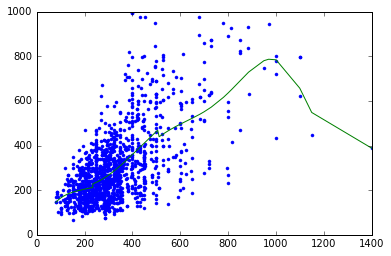

In [33]:
l2_small_penalty = 1e-5
degree = 15
set1_poly_data = polynomial_sframe(set_1['size'], degree)
set1_features = set1_poly_data.column_names() # get the name of the features
set1_poly_data['price'] = set_1['price'] # add price to the data since it's the target
set1_model = graphlab.linear_regression.create(set1_poly_data, target = 'price', features = set1_features, l2_penalty=l2_small_penalty,verbose=False,
                                          validation_set=None)
plt.plot(set1_poly_data['power_1'],set1_poly_data['price'],'.',
        set1_poly_data['power_1'], set1_model.predict(set1_poly_data),'-')
set1_model.get("coefficients").print_rows(2)

+-------------+-------+----------------+---------------+
|     name    | index |     value      |     stderr    |
+-------------+-------+----------------+---------------+
| (intercept) |  None | -34.6416511451 | 190.347521484 |
|   power_1   |  None | 4.21684878574  | 1.23996280772 |
+-------------+-------+----------------+---------------+
[16 rows x 4 columns]



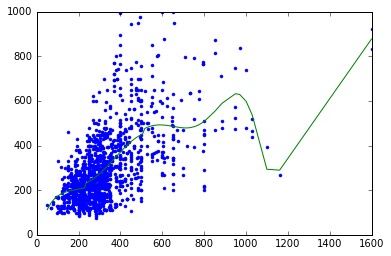

In [34]:
set2_poly_data = polynomial_sframe(set_2['size'], degree)
set2_features = set2_poly_data.column_names() # get the name of the features
set2_poly_data['price'] = set_2['price'] # add price to the data since it's the target
set2_model = graphlab.linear_regression.create(set2_poly_data, target = 'price', features = set2_features, l2_penalty=l2_small_penalty,verbose=False,
                                          validation_set=None)
plt.plot(set2_poly_data['power_1'],set2_poly_data['price'],'.',
        set2_poly_data['power_1'], set2_model.predict(set2_poly_data),'-')
set2_model.get("coefficients").print_rows(2)

+-------------+-------+----------------+---------------+
|     name    | index |     value      |     stderr    |
+-------------+-------+----------------+---------------+
| (intercept) |  None | -192.958182596 | 548.094332039 |
|   power_1   |  None | 6.61642095357  | 13.7238063779 |
+-------------+-------+----------------+---------------+
[16 rows x 4 columns]



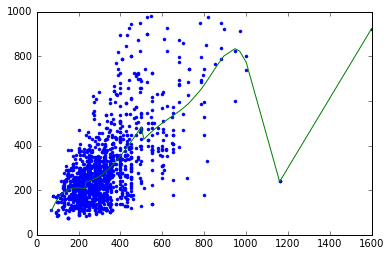

In [35]:
set3_poly_data = polynomial_sframe(set_3['size'], degree)
set3_features = set3_poly_data.column_names() # get the name of the features
set3_poly_data['price'] = set_3['price'] # add price to the data since it's the target
set3_model = graphlab.linear_regression.create(set3_poly_data, target = 'price', features = set3_features, l2_penalty=l2_small_penalty,verbose=False,
                                          validation_set=None)
plt.plot(set3_poly_data['power_1'],set3_poly_data['price'],'.',
        set3_poly_data['power_1'], set3_model.predict(set3_poly_data),'-')
set3_model.get("coefficients").print_rows(2)

+-------------+-------+----------------+---------------+
|     name    | index |     value      |     stderr    |
+-------------+-------+----------------+---------------+
| (intercept) |  None | 145.290597865  | 92.0105870058 |
|   power_1   |  None | 0.648484838497 | 2.94246984746 |
+-------------+-------+----------------+---------------+
[16 rows x 4 columns]



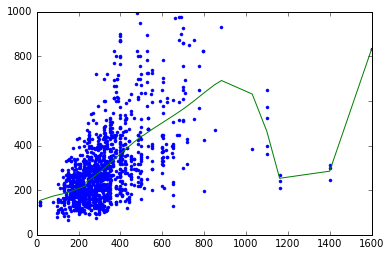

In [36]:
set4_poly_data = polynomial_sframe(set_4['size'], degree)
set4_features = set4_poly_data.column_names() # get the name of the features
set4_poly_data['price'] = set_4['price'] # add price to the data since it's the target
set4_model = graphlab.linear_regression.create(set4_poly_data, target = 'price', features = set4_features, l2_penalty=l2_small_penalty,verbose=False,
                                          validation_set=None)
plt.plot(set4_poly_data['power_1'],set4_poly_data['price'],'.',
        set4_poly_data['power_1'], set4_model.predict(set4_poly_data),'-')
set4_model.get("coefficients").print_rows(2)

As we can see, the four curves are different from one another a lot, as should the coefficients we have learned.

# Ridge regression comes to rescue¶


Generally, whenever we see weights change so much in response to change in data, we believe the variance of our estimate to be large. Ridge regression aims to address this issue by penalizing "large" weights. (Weights of model15 looked quite small, but they are not that small because 'size' input is in the order of thousands.)

With the argument l2_penalty=1e5, fit a 15th-order polynomial model on set_1, set_2, set_3, and set_4. Other than the change in the l2_penalty parameter, the code should be the same as the experiment above. Also, make sure GraphLab Create doesn't create its own validation set by using the option validation_set = None in this call.


+-------------+-------+-----------------+---------------+
|     name    | index |      value      |     stderr    |
+-------------+-------+-----------------+---------------+
| (intercept) |  None |  274.431708247  | 1332.07546344 |
|   power_1   |  None | 0.0178371375758 |  39.453742199 |
+-------------+-------+-----------------+---------------+
[16 rows x 4 columns]



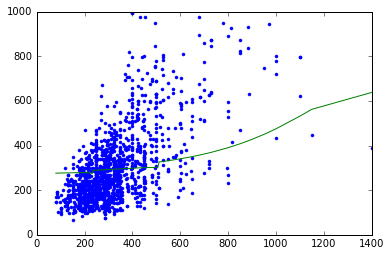

In [71]:
l2_penalty = 7000
degree = 15
set1_poly_data = polynomial_sframe(set_1['size'], degree)
set1_features = set1_poly_data.column_names() # get the name of the features
set1_poly_data['price'] = set_1['price'] # add price to the data since it's the target
set1_model = graphlab.linear_regression.create(set1_poly_data, target = 'price', features = set1_features, l2_penalty=l2_penalty,verbose=False,
                                          validation_set=None)
plt.plot(set1_poly_data['power_1'],set1_poly_data['price'],'.',
        set1_poly_data['power_1'], set1_model.predict(set1_poly_data),'-')
set1_model.get("coefficients").print_rows(2)

+-------------+-------+-----------------+---------------+
|     name    | index |      value      |     stderr    |
+-------------+-------+-----------------+---------------+
| (intercept) |  None |  277.160523274  | 228.047517596 |
|   power_1   |  None | 0.0164770528056 | 1.48554831713 |
+-------------+-------+-----------------+---------------+
[16 rows x 4 columns]



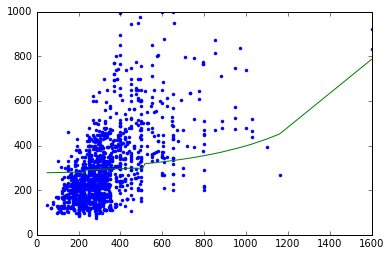

In [72]:
set2_poly_data = polynomial_sframe(set_2['size'], degree)
set2_features = set2_poly_data.column_names() # get the name of the features
set2_poly_data['price'] = set_2['price'] # add price to the data since it's the target
set2_model = graphlab.linear_regression.create(set2_poly_data, target = 'price', features = set2_features, l2_penalty=l2_penalty,verbose=False,
                                          validation_set=None)
plt.plot(set2_poly_data['power_1'],set2_poly_data['price'],'.',
        set2_poly_data['power_1'], set2_model.predict(set2_poly_data),'-')
set2_model.get("coefficients").print_rows(2)

+-------------+-------+-----------------+---------------+
|     name    | index |      value      |     stderr    |
+-------------+-------+-----------------+---------------+
| (intercept) |  None |  276.811260337  | 682.668301308 |
|   power_1   |  None | 0.0182229942342 | 17.0934217704 |
+-------------+-------+-----------------+---------------+
[16 rows x 4 columns]



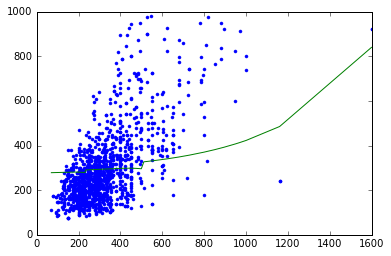

In [73]:
set3_poly_data = polynomial_sframe(set_3['size'], degree)
set3_features = set3_poly_data.column_names() # get the name of the features
set3_poly_data['price'] = set_3['price'] # add price to the data since it's the target
set3_model = graphlab.linear_regression.create(set3_poly_data, target = 'price', features = set3_features, l2_penalty=l2_penalty,verbose=False,
                                          validation_set=None)
plt.plot(set3_poly_data['power_1'],set3_poly_data['price'],'.',
        set3_poly_data['power_1'], set3_model.predict(set3_poly_data),'-')
set3_model.get("coefficients").print_rows(2)

+-------------+-------+-----------------+---------------+
|     name    | index |      value      |     stderr    |
+-------------+-------+-----------------+---------------+
| (intercept) |  None |  280.576154089  | 111.058989485 |
|   power_1   |  None | 0.0156326824704 | 3.55163181197 |
+-------------+-------+-----------------+---------------+
[16 rows x 4 columns]



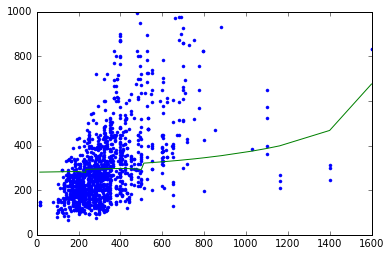

In [74]:
set4_poly_data = polynomial_sframe(set_4['size'], degree)
set4_features = set4_poly_data.column_names() # get the name of the features
set4_poly_data['price'] = set_4['price'] # add price to the data since it's the target
set4_model = graphlab.linear_regression.create(set4_poly_data, target = 'price', features = set4_features, l2_penalty=l2_penalty,verbose=False,
                                          validation_set=None)
plt.plot(set4_poly_data['power_1'],set4_poly_data['price'],'.',
        set4_poly_data['power_1'], set4_model.predict(set4_poly_data),'-')
set4_model.get("coefficients").print_rows(2)

As we can see, these curves should vary a lot less, now that we applied a high degree of regularization.


# Selecting an L2 penalty via cross-validation


Just like the polynomial degree, the L2 penalty is a "magic" parameter we need to select. We could use the validation set approach as we did in the last module, but that approach has a major disadvantage: it leaves fewer observations available for training. Cross-validation seeks to overcome this issue by using all of the training set in a smart way.

We will implement a kind of cross-validation called k-fold cross-validation. The method gets its name because it involves dividing the training set into k segments of roughtly equal size. Similar to the validation set method, we measure the validation error with one of the segments designated as the validation set. The major difference is that we repeat the process k times as follows:

Set aside segment 0 as the validation set, and fit a model on rest of data, and evalutate it on this validation set
Set aside segment 1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set
...
Set aside segment k-1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set

After this process, we compute the average of the k validation errors, and use it as an estimate of the generalization error. Notice that all observations are used for both training and validation, as we iterate over segments of data.

To estimate the generalization error well, it is crucial to shuffle the training data before dividing them into segments. GraphLab Create has a utility function for shuffling a given SFrame. We reserve 10% of the data as the test set and shuffle the remainder.

In [75]:
(train_valid, test) = hotels.random_split(.9, seed=1)
train_valid_shuffled = graphlab.toolkits.cross_validation.shuffle(train_valid, random_seed=1)

Once the data is shuffled, we divide it into equal segments. Each segment should receive n/k elements, where n is the number of observations in the training set and k is the number of segments. Since the segment 0 starts at index 0 and contains n/k elements, it ends at index (n/k)-1. The segment 1 starts where the segment 0 left off, at index (n/k). With n/k elements, the segment 1 ends at index (n*2/k)-1. Continuing in this fashion, we deduce that the segment i starts at index (n*i/k) and ends at (n*(i+1)/k)-1.

With this pattern in mind, we write a short loop that prints the starting and ending indices of each segment.

In [76]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

for i in xrange(k):
    start = (n*i)/k
    end = (n*(i+1))/k-1
    print i, (start, end)
    
print n/k

0 (0, 482)
1 (483, 965)
2 (966, 1448)
3 (1449, 1932)
4 (1933, 2415)
5 (2416, 2898)
6 (2899, 3382)
7 (3383, 3865)
8 (3866, 4348)
9 (4349, 4832)
483


To extract a continuous slice from an SFrame, use colon in square brackets.

In [77]:
train_valid_shuffled[0:10] # rows 0 to 9

name,zone,zipcode,star,rating,rates,checkin,checkout
DoubleTree Suites byHilton New York City - ...,Broadway - Times Square,10036.0,4.0,4.4,"8,258",04/23/2017,04/24/2017
Stewart Hotel,Madison Square Garden,10001.0,4.0,4.0,"7,197",04/21/2017,04/22/2017
Viceroy Central Park NewYork ...,Broadway - Times Square,10019.0,5.0,4.2,868,04/22/2017,04/23/2017
Henry Norman Hotel,Brooklyn,11222.0,3.5,4.7,237,04/22/2017,04/23/2017
Hilton Garden Inn NewYork-Times Square Cen ...,Broadway - Times Square,10036.0,3.5,4.2,"1,814",04/21/2017,04/22/2017
Warwick New York,Broadway - Times Square,10019.0,4.5,4.4,"4,340",04/21/2017,04/22/2017
W New York - Times Square,Broadway - Times Square,10036.0,4.5,4.2,"2,438",04/22/2017,04/23/2017
Vanderbilt YMCA,Midtown East - GrandCentral ...,10017.0,2.0,3.2,942,04/22/2017,04/23/2017
Hotel 48LEX New York,Midtown East - GrandCentral ...,10017.0,4.5,4.5,731,04/23/2017,04/24/2017
Element New York TimesSquare West ...,Broadway - Times Square,10018.0,3.5,4.4,"5,946",04/23/2017,04/24/2017


We will extract individual segments with array slicing. Consider the scenario where we group the hotels in the train_valid_shuffled dataframe into k=10 segments of roughly equal size, with starting and ending indices computed as above. Extract the fourth segment (segment 3) and assign it to a variable called validation4.

In [78]:
validation4 = train_valid_shuffled[1449 : 1933]
validation4

name,zone,zipcode,star,rating,rates,checkin,checkout
Heritage Hotel,Chelsea,10010.0,2.5,3.6,135,04/21/2017,04/22/2017
"The Ritz-Carlton NewYork, Battery Park ...",Wall Street - FinancialDistrict ...,10004.0,5.0,4.6,"1,130",04/21/2017,04/22/2017
Grand Hyatt New York,Midtown East - GrandCentral ...,10017.0,4.0,4.2,"8,337",04/22/2017,04/23/2017
W New York - Downtown,Wall Street - FinancialDistrict ...,10006.0,4.5,4.2,691,04/22/2017,04/23/2017
Four Seasons New YorkDowntown ...,Wall Street - FinancialDistrict ...,10007.0,5.0,4.9,14,04/21/2017,04/22/2017
Loews Regency New YorkHotel ...,Upper East Side,10065.0,5.0,4.6,797,04/22/2017,04/23/2017
Andaz 5th Avenue - aconcept by Hyatt ...,Broadway - Times Square,10017.0,4.5,4.7,842,04/22/2017,04/23/2017
Sheraton New York TimesSquare Hotel ...,Broadway - Times Square,10019.0,4.0,4.0,"8,307",04/23/2017,04/24/2017
The Westin New York GrandCentral ...,Midtown East - GrandCentral ...,10017.0,4.5,4.4,"1,765",04/21/2017,04/22/2017
Grand Hyatt New York,Midtown East - GrandCentral ...,10017.0,4.0,4.2,"8,337",04/22/2017,04/23/2017


To verify that we have the right elements extracted, run the following cell, which computes the average price of the fourth segment. When rounded to nearest whole number, the average should be $.

In [79]:
print int(round(validation4['price'].mean(), 0))

299


After designating one of the k segments as the validation set, we train a model using the rest of the data. To choose the remainder, we slice (0:start) and (end+1:n) of the data and paste them together. 

SFrame has append() method that pastes together two disjoint sets of rows originating from a common dataset. For instance, the following cell pastes together the first and last two rows of the train_valid_shuffled dataframe.

In [80]:
# test
n = len(train_valid_shuffled)
first_two = train_valid_shuffled[0:2]
last_two = train_valid_shuffled[n-2:n]
print first_two.append(last_two)

+-------------------------------+-------------------------+---------+------+--------+
|              name             |           zone          | zipcode | star | rating |
+-------------------------------+-------------------------+---------+------+--------+
| DoubleTree Suites by Hilto... | Broadway - Times Square | 10036.0 | 4.0  |  4.4   |
|         Stewart Hotel         |  Madison Square Garden  | 10001.0 | 4.0  |  4.0   |
|      Hilton Times Square      | Broadway - Times Square | 10036.0 | 4.0  |  4.5   |
| The Chatwal, a Luxury Coll... | Broadway - Times Square | 10036.0 | 5.0  |  4.7   |
+-------------------------------+-------------------------+---------+------+--------+
+-------+------------+------------+-------------------------------+------+-------+
| rates |  checkin   |  checkout  |              room             | size | price |
+-------+------------+------------+-------------------------------+------+-------+
| 8,258 | 04/23/2017 | 04/24/2017 | Standard Suite One King an.

Extract the remainder of the data after excluding fourth segment (segment 3) and assign the subset to train4.

In [81]:
#[0:start]
before = train_valid_shuffled[0:1449]
#[end+1:n]
after = train_valid_shuffled[1933:n]
train4 = before.append(after)
print len(train4), n - n/10

4349 4350


To verify that we have the right elements extracted, run the following cell, which computes the average price of the data with fourth segment excluded. When rounded to nearest whole number, the average should be $294.

In [83]:
print int(round(train4['price'].mean(), 0))

294


Now we are ready to implement k-fold cross-validation. Write a function that computes k validation errors by designating each of the k segments as the validation set. It accepts as parameters 

(i) k, 
(ii) l2_penalty, 
(iii) dataframe, 
(iv) name of output column (e.g. price)
(v) list of feature names. 

The function returns the average validation error using k segments as validation sets.

* For each i in [0, 1, ..., k-1]:
    * Compute starting and ending indices of segment i and call 'start' and 'end'
    * Form validation set by taking a slice (start:end+1) from the data.
    * Form training set by appending slice (end+1:n) to the end of slice (0:start).
    * Train a linear model using training set just formed, with a given l2_penalty
    * Compute validation error using validation set just formed

In [84]:
def k_fold_cross_validation(k, l2_penalty, data, output_name, features_list):
    vali_error_sum = 0
    n = len(data) 
    for i in xrange(k):
        start = (n * i) / k
        end = (n * (i + 1))/ k - 1
        validation_set = data[start : end + 1]
        train_set = data[0 : start].append(data[end + 1 : n])
        model = graphlab.linear_regression.create(train_set, target = output_name, features = features_list, l2_penalty=l2_penalty,
                                                  verbose=False,validation_set=None)
        predicitons = model.predict(validation_set)
        residuals = predicitons - validation_set[output_name]
        rss =  sum(residuals**2)
        vali_error_sum += rss
    
    ave =  vali_error_sum / k
    return ave

Once we have a function to compute the average validation error for a model, we can write a loop to find the model that minimizes the average validation error.


* We will again be aiming to fit a 15th-order polynomial model using the size input
* For l2_penalty in [10^1, 10^1.5, 10^2, 10^2.5, ..., 10^7] (Numpy function: np.logspace(1, 7, num=13).)
* Run 10-fold cross-validation with l2_penalty
* Report which L2 penalty produced the lowest average validation error.

Since the degree of the polynomial is now fixed to 15, to make things faster, we should generate polynomial features in advance and re-use them throughout the loop. Make sure to use train_valid_shuffled when generating polynomial features!


In [85]:
degree = 15
poly_data = polynomial_sframe(train_valid_shuffled['size'], degree)
features = poly_data.column_names() # get the name of the features
poly_data['price'] = train_valid_shuffled['price'] # add price to the data since it's the target

l2_penalty = np.logspace(1, 7, num=13)
k = 10
data = poly_data
output_name = 'price'
features_list = features
k_fold_cross_validation(k, l2_penalty[0], data, output_name, features_list)

7615364.541746682

In [86]:
val_err_dict = {}
for l2_penalty in np.logspace(1, 7, num=13):
    val_err = k_fold_cross_validation(k, l2_penalty, poly_data, output_name, features_list)    
    #print l2_penalty # val_err
    val_err_dict[l2_penalty] = val_err
import pprint 
pprint.pprint(val_err_dict)

{10.0: 7615364.541746682,
 31.622776601683793: 7637411.68574772,
 100.0: 7721047.114119877,
 316.22776601683796: 7936543.92672014,
 1000.0: 8443854.6990764,
 3162.2776601683795: 9431317.926447181,
 10000.0: 10533302.015685903,
 31622.776601683792: 11362307.332518894,
 100000.0: 11857800.405767659,
 316227.76601683791: 12117316.432790216,
 1000000.0: 12227767.467988815,
 3162277.6601683795: 12267274.708156649,
 10000000.0: 12280315.857841142}


In [89]:
#compute the lowest average validation error  
print min(val_err_dict.items(), key = lambda x: x[1]) 
min_val = min(val_err_dict.itervalues())
print min(val_err_dict, key=val_err_dict.get)
print min_val

(10.0, 7615364.541746682)
10.0
7615364.54175


It is useful to plot the k-fold cross-validation errors we have obtained to better understand the behavior of the method.

In [90]:
l2_penalty = graphlab.SArray(val_err_dict.keys())
validation_error = graphlab.SArray(val_err_dict.values())
sf = graphlab.SFrame({'l2_penalty':l2_penalty,'validation_error':validation_error})
print sf.print_rows(13)
print len(sf)

+---------------+------------------+
|   l2_penalty  | validation_error |
+---------------+------------------+
|    100000.0   |  11857800.4058   |
| 316227.766017 |  12117316.4328   |
|     100.0     |  7721047.11412   |
| 3162.27766017 |  9431317.92645   |
| 31.6227766017 |  7637411.68575   |
|     1000.0    |  8443854.69908   |
|      10.0     |  7615364.54175   |
| 31622.7766017 |  11362307.3325   |
|    10000.0    |  10533302.0157   |
| 3162277.66017 |  12267274.7082   |
| 316.227766017 |  7936543.92672   |
|   1000000.0   |   12227767.468   |
|   10000000.0  |  12280315.8578   |
+---------------+------------------+
[13 rows x 2 columns]

None
13


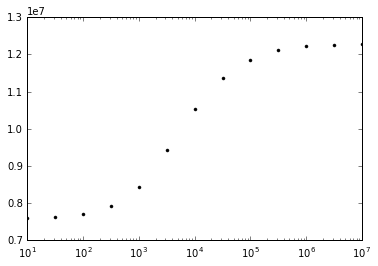

In [91]:
# Plot the l2_penalty values in the x axis and the cross-validation error in the y axis.
# Using plt.xscale('log') will make the plot more intuitive.
plt.plot(sf['l2_penalty'],sf['validation_error'],'k.')
plt.xscale('log')


It is important to retrain a final model on all of the training data using this value of l2_penalty. This way, our final model will be trained on the entire dataset.

In [92]:
poly_data = polynomial_sframe(train_valid_shuffled['size'], 15)
features_list = poly_data.column_names()
poly_data['price'] = train_valid_shuffled['price']
l2_penalty_best = 10.0

model = graphlab.linear_regression.create(poly_data, target='price',
                                         features=features_list,
                                         l2_penalty=l2_penalty_best,
                                         verbose = False,
                                         validation_set=None)

In [94]:
# the best RSS
predictions = model.predict(test)
errors = predictions - test['price']
rss = (errors * errors).sum()
print rss

18423054.6709


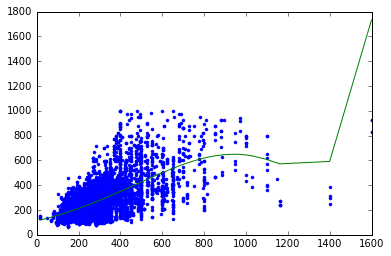

In [97]:
poly_data = polynomial_sframe(train_valid['size'], 15)
poly_data['price'] = train_valid['price']
plt.plot(poly_data['power_1'],poly_data['price'],'.',
        poly_data['power_1'], model.predict(poly_data),'-')